In [1]:
from google.colab import drive
import os
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
os.listdir(root_dir)

Mounted at /content/gdrive


['UAH',
 'Colab Notebooks',
 'Prácticas Sistemas de Control Inteligente',
 'Coursera',
 'Artefacto 10 - Ing. Software Av..gdoc',
 'Artefacto 11 - Ing. Software Av..gdoc',
 'Artefacto 8 - Ing. Software Av..gdoc',
 'Artefacto 9 - Ing. Software Av..gdoc',
 'Google Colab',
 'Ubicua 2.0',
 'PECL1-BDA_2019-20.gdoc',
 'course-v3-master']

In [0]:
classes = ['Yuga_Aoyama', 'Mina_Ashido', 'Tsuyu_Asui', 'Tenya_Iida', 'Ochaco_Uraraka', 'Mashirao_Ojiro', 'Denki_Kaminari', 'Eijiro_Kirishima',
           'Koji_Koda', 'Rikido_Sato', 'Mezo_Shoji', 'Kyoka_Jiro', 'Hanta_Sero', 'Fumikage_Tokoyami', 'Shoto_Todoroki', 'Toru_Hagakure',
           'Katsuki_Bakugo', 'Izuku_Midoriya', 'Minoru_Mineta', 'Momo_Yaoyorozu']

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
path = Path(root_dir+"Google Colab/MyResNetAcademia")

In [0]:
for class_ in classes:
  folder = str(class_)
  file = str(class_) + ".txt"
  dest = path/folder
  dest.mkdir(parents=True, exist_ok=True)
  download_images(path/file, dest, max_pics=200)

In [0]:
for class_ in classes:
  print(class_)
  verify_images(path/class_, delete=True, max_workers=8)

Yuga_Aoyama


Mina_Ashido


Tsuyu_Asui


Tenya_Iida


Ochaco_Uraraka


Mashirao_Ojiro


Denki_Kaminari


Eijiro_Kirishima


Koji_Koda


Rikido_Sato


Mezo_Shoji


Kyoka_Jiro


Hanta_Sero


Fumikage_Tokoyami


Shoto_Todoroki


Toru_Hagakure


Katsuki_Bakugo


Izuku_Midoriya


Minoru_Mineta


Momo_Yaoyorozu


In [0]:
np.random.seed(1245)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(),
                                  size=224).normalize(imagenet_stats)

In [0]:
data.classes

['Denki_Kaminari',
 'Eijiro_Kirishima',
 'Fumikage_Tokoyami',
 'Hanta_Sero',
 'Izuku_Midoriya',
 'Katsuki_Bakugo',
 'Koji_Koda',
 'Kyoka_Jiro',
 'Mashirao_Ojiro',
 'Mezo_Shoji',
 'Mina_Ashido',
 'Minoru_Mineta',
 'Momo_Yaoyorozu',
 'Ochaco_Uraraka',
 'Rikido_Sato',
 'Shoto_Todoroki',
 'Tenya_Iida',
 'Toru_Hagakure',
 'Tsuyu_Asui',
 'Yuga_Aoyama']

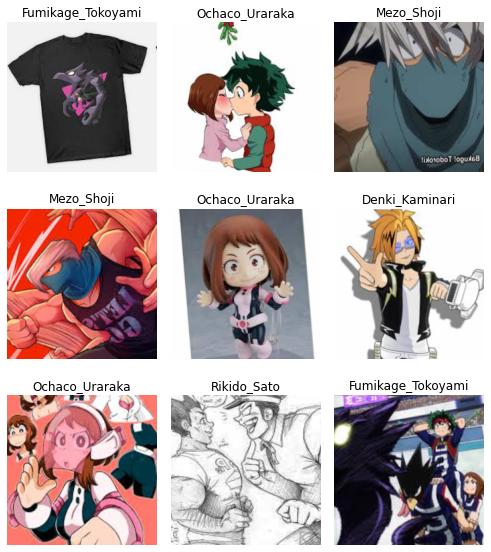

In [0]:
data.show_batch(rows=3, figsize=(7,8))

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,3.528782,1.958283,0.561290,00:07
1,2.468009,1.716795,0.477419,00:07


In [0]:
learn.save('save1')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

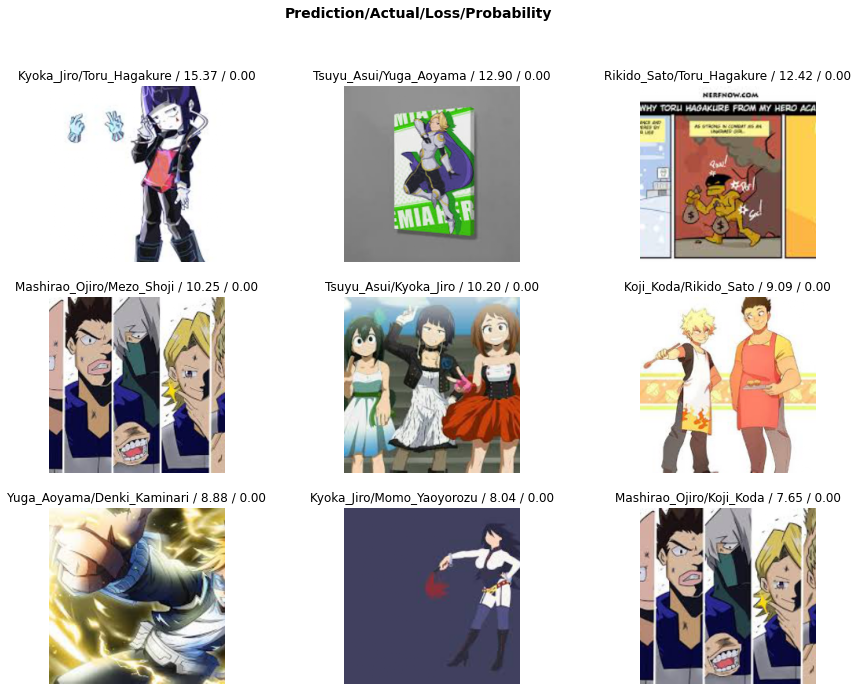

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

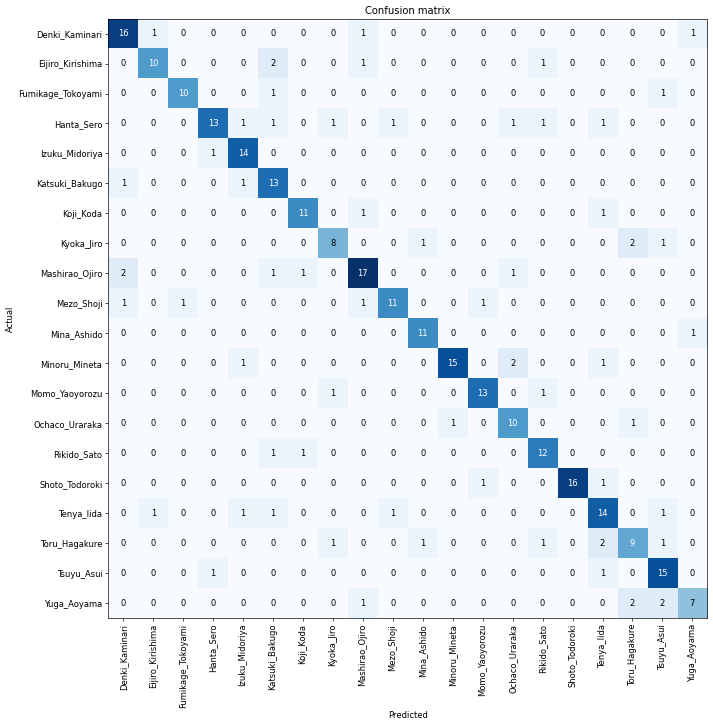

In [0]:
interp.plot_confusion_matrix(figsize =(12,12), dpi=60)

In [0]:
interp.most_confused(min_val=2)

[('Eijiro_Kirishima', 'Katsuki_Bakugo', 2),
 ('Kyoka_Jiro', 'Toru_Hagakure', 2),
 ('Mashirao_Ojiro', 'Denki_Kaminari', 2),
 ('Minoru_Mineta', 'Ochaco_Uraraka', 2),
 ('Toru_Hagakure', 'Tenya_Iida', 2),
 ('Yuga_Aoyama', 'Toru_Hagakure', 2),
 ('Yuga_Aoyama', 'Tsuyu_Asui', 2)]

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.701104,1.440871,0.377419,00:08


In [0]:
learn.load('save1')

Learner(data=ImageDataBunch;

Train: LabelList (1240 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Yuga_Aoyama,Yuga_Aoyama,Yuga_Aoyama,Yuga_Aoyama,Yuga_Aoyama
Path: /content/gdrive/My Drive/Google Colab/MyResNetAcademia;

Valid: LabelList (310 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Tsuyu_Asui,Mashirao_Ojiro,Yuga_Aoyama,Tsuyu_Asui,Denki_Kaminari
Path: /content/gdrive/My Drive/Google Colab/MyResNetAcademia;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


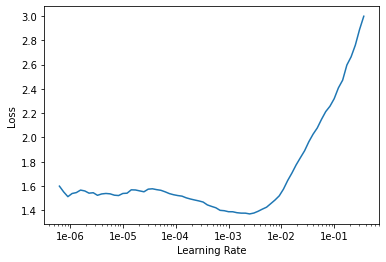

In [0]:
learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(10, max_lr=slice(1e-5, 5e-2))

epoch,train_loss,valid_loss,error_rate,time
0,1.796415,1.750094,0.409677,00:07
1,1.634174,5.079767,0.509677,00:08
2,1.920803,4.867276,0.535484,00:07
3,1.947971,5.556607,0.480645,00:08
4,1.754238,1.703020,0.316129,00:07
5,1.451946,1.301116,0.280645,00:08
6,1.136062,1.135907,0.248387,00:08
7,0.902674,1.020987,0.206452,00:08
8,0.710514,0.970639,0.206452,00:08
9,0.558257,0.962991,0.209677,00:08


In [0]:
learn.save(path/'save2')
learn.export(path/'save2.pkl')

In [0]:
learn.load(path/'save2')

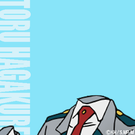

In [19]:
img = open_image(path/'Tooru_Hagakure_Portrait.png')
img

In [0]:
pred_class, pred_idx, outputs = learn.predict(img)
print(pred_class)

Toru_Hagakure


In [0]:
learn_ = load_learner(path, 'save2.pkl')

In [0]:
print(learn.predict(img)[0])

Toru_Hagakure


In [16]:
export_file_url = 'https://drive.google.com/uc?export=download&id=1-RfSNhDaIb9lNTohliNyNcRrZ6G_yeDd'
export_file_name = 'save2.pkl'
async def download_file(url, dest):
    if dest.exists(): return
    async with aiohttp.ClientSession() as session:
        async with session.get(url) as response:
            data = await response.read()
            with open(dest, 'wb') as f:
                f.write(data)

<coroutine object download_file at 0x7f88f531c308>

In [17]:
download_file(export_file_url, path / export_file_name)

<coroutine object download_file at 0x7f88f531cd00>

In [0]:
learn__ = load_learner(path, export_file_name)

In [22]:
print(learn__.predict(img)[0])

Toru_Hagakure
